In [2]:
import pandas as pd
import re

df = pd.read_csv('jobstreet_3000_selected3.csv')
df.head()


,content,score
0,Nyaman dan tepat the best resposif,5
1,ni gimanasii daritdi mau bikin akun (register)...,2
2,Gak bisa masuk,2
3,saya mau posting thread tidak bisa terposting,3
4,Maaf saya tidak bisa buka jobstreet setiap say...,1


In [3]:
df.shape

(3000, 2)

# Casefolding

In [83]:
# Kalau mau hapus data pakai drop
#df_drop = df.drop('score', axis=1)

#df_drop

In [4]:
import string

def preprocess_text(kalimat):
    # Merubah kalimat menjadi lowercase
    lower_case = kalimat.lower()

    # Menghapus angka dari kalimat
    hasil = re.sub(r"\d+", "", lower_case)

    # Menghapus tanda baca dari kalimat
    hasil = hasil.translate(str.maketrans("","",string.punctuation))

    # Menghapus spasi pada awal dan akhir kalimat
    hasil = hasil.strip()

    return hasil

df['clean_text'] = df['content'].apply(preprocess_text)
df.head()

,content,score,clean_text
0,Nyaman dan tepat the best resposif,5,nyaman dan tepat the best resposif
1,ni gimanasii daritdi mau bikin akun (register)...,2,ni gimanasii daritdi mau bikin akun register a...
2,Gak bisa masuk,2,gak bisa masuk
3,saya mau posting thread tidak bisa terposting,3,saya mau posting thread tidak bisa terposting
4,Maaf saya tidak bisa buka jobstreet setiap say...,1,maaf saya tidak bisa buka jobstreet setiap say...


# Tokenizing

In [5]:
import nltk
from nltk.tokenize import word_tokenize

#nltk.download('all') #untuk download semua data nltk
nltk.download('punkt') #untuk tokenisasi
nltk.download('punkt_tab') #untuk tokenisasi
#nltk.download('stopwords') #untuk stopword


[nltk_data] Downloading package punkt to /home/anfiniti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/anfiniti/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
def tokenisasi(kalimat):
    tokens = word_tokenize(kalimat)
    return tokens

In [7]:
df['token'] = df['clean_text'].apply(tokenisasi)
df.head()

,content,score,clean_text,token
0,Nyaman dan tepat the best resposif,5,nyaman dan tepat the best resposif,"[nyaman, dan, tepat, the, best, resposif]"
1,ni gimanasii daritdi mau bikin akun (register)...,2,ni gimanasii daritdi mau bikin akun register a...,"[ni, gimanasii, daritdi, mau, bikin, akun, reg..."
2,Gak bisa masuk,2,gak bisa masuk,"[gak, bisa, masuk]"
3,saya mau posting thread tidak bisa terposting,3,saya mau posting thread tidak bisa terposting,"[saya, mau, posting, thread, tidak, bisa, terp..."
4,Maaf saya tidak bisa buka jobstreet setiap say...,1,maaf saya tidak bisa buka jobstreet setiap say...,"[maaf, saya, tidak, bisa, buka, jobstreet, set..."


# Filtering (Stopword Removal)

In [9]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.get_stop_words()
print(stopword)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [10]:
def stop_word_removal(tokens):
    cleaned_tokens = []
    for token in tokens:
        if token not in stopword:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [11]:
df['stopword_removal'] = df['token'].apply(stop_word_removal)
df.head()

,content,score,clean_text,token,stopword_removal
0,Nyaman dan tepat the best resposif,5,nyaman dan tepat the best resposif,"[nyaman, dan, tepat, the, best, resposif]","[nyaman, tepat, the, best, resposif]"
1,ni gimanasii daritdi mau bikin akun (register)...,2,ni gimanasii daritdi mau bikin akun register a...,"[ni, gimanasii, daritdi, mau, bikin, akun, reg...","[ni, gimanasii, daritdi, mau, bikin, akun, reg..."
2,Gak bisa masuk,2,gak bisa masuk,"[gak, bisa, masuk]","[gak, masuk]"
3,saya mau posting thread tidak bisa terposting,3,saya mau posting thread tidak bisa terposting,"[saya, mau, posting, thread, tidak, bisa, terp...","[mau, posting, thread, terposting]"
4,Maaf saya tidak bisa buka jobstreet setiap say...,1,maaf saya tidak bisa buka jobstreet setiap say...,"[maaf, saya, tidak, bisa, buka, jobstreet, set...","[maaf, buka, jobstreet, register, masuk, ga, k..."


# Stemming

In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [13]:
def stemming_text(tokens):
    hasil = [stemmer.stem(token) for token in tokens]
    return hasil

In [14]:
df['stemming'] = df['stopword_removal'].apply(stemming_text)
df.head()

,content,score,clean_text,token,stopword_removal,stemming
0,Nyaman dan tepat the best resposif,5,nyaman dan tepat the best resposif,"[nyaman, dan, tepat, the, best, resposif]","[nyaman, tepat, the, best, resposif]","[nyaman, tepat, the, best, resposif]"
1,ni gimanasii daritdi mau bikin akun (register)...,2,ni gimanasii daritdi mau bikin akun register a...,"[ni, gimanasii, daritdi, mau, bikin, akun, reg...","[ni, gimanasii, daritdi, mau, bikin, akun, reg...","[ni, gimanasii, daritdi, mau, bikin, akun, reg..."
2,Gak bisa masuk,2,gak bisa masuk,"[gak, bisa, masuk]","[gak, masuk]","[gak, masuk]"
3,saya mau posting thread tidak bisa terposting,3,saya mau posting thread tidak bisa terposting,"[saya, mau, posting, thread, tidak, bisa, terp...","[mau, posting, thread, terposting]","[mau, posting, thread, terposting]"
4,Maaf saya tidak bisa buka jobstreet setiap say...,1,maaf saya tidak bisa buka jobstreet setiap say...,"[maaf, saya, tidak, bisa, buka, jobstreet, set...","[maaf, buka, jobstreet, register, masuk, ga, k...","[maaf, buka, jobstreet, register, masuk, ga, b..."


In [15]:
print(df['stemming'])

0                    [nyaman, tepat, the, best, resposif]
1       [ni, gimanasii, daritdi, mau, bikin, akun, reg...
2                                            [gak, masuk]
3                      [mau, posting, thread, terposting]
4       [maaf, buka, jobstreet, register, masuk, ga, b...
                              ...                        
2995                           [tetap, ikan, layan, baik]
2996                                             [mantap]
2997                                                   []
2998                         [sangat, bantu, cari, loker]
2999                             [terimakasih, jobstreet]
Name: stemming, Length: 3000, dtype: object


# Viz

In [16]:
from nltk.probability import FreqDist

In [17]:
import matplotlib.pyplot as plt

In [18]:
all_tokens = [token for tokens in df['stemming'] for token in tokens]
fdist = FreqDist(all_tokens)
print(fdist.most_common())

[('kerja', 950), ('aplikasi', 651), ('sangat', 490), ('yg', 485), ('cari', 472), ('jobstreet', 471), ('lamar', 425), ('bantu', 405), ('usaha', 376), ('banyak', 372), ('lowong', 333), ('bagus', 318), ('nya', 315), ('loker', 288), ('update', 260), ('lebih', 243), ('ga', 236), ('malah', 235), ('tipu', 223), ('panggil', 213), ('baru', 199), ('baik', 198), ('mudah', 187), ('jadi', 184), ('gak', 180), ('login', 177), ('aja', 163), ('buat', 161), ('good', 153), ('sekarang', 147), ('sama', 142), ('apk', 141), ('lama', 140), ('masuk', 128), ('sekali', 124), ('dulu', 121), ('udah', 121), ('terima', 121), ('mau', 119), ('buka', 116), ('interview', 116), ('', 116), ('moga', 114), ('kasih', 114), ('sesuai', 113), ('jelas', 111), ('pernah', 108), ('selalu', 103), ('banget', 101), ('pt', 101), ('email', 100), ('susah', 100), ('semua', 99), ('makin', 99), ('guna', 99), ('apply', 99), ('padahal', 97), ('tampil', 97), ('info', 90), ('apa', 89), ('sini', 86), ('terus', 83), ('lihat', 81), ('kali', 80), (

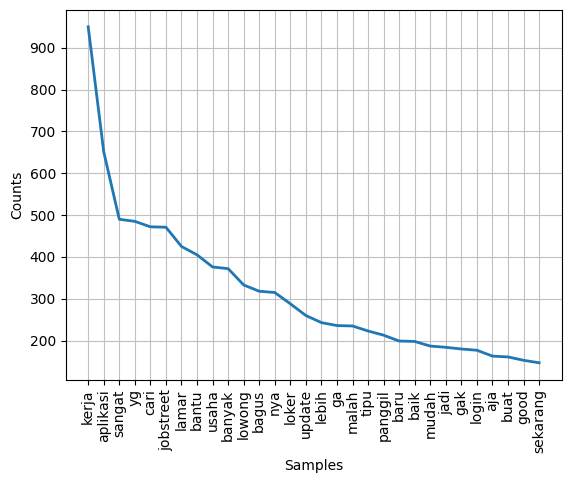

In [19]:
fdist.plot(30, cumulative=False)
plt.show()

# Simpan dataset bersih

In [20]:
df.to_csv('jobstreet_3000_clean.csv', index=False)

In [21]:
data = pd.read_csv('jobstreet_3000_clean.csv')
data.head(20)

,content,score,clean_text,token,stopword_removal,stemming
0,Nyaman dan tepat the best resposif,5,nyaman dan tepat the best resposif,"['nyaman', 'dan', 'tepat', 'the', 'best', 'res...","['nyaman', 'tepat', 'the', 'best', 'resposif']","['nyaman', 'tepat', 'the', 'best', 'resposif']"
1,ni gimanasii daritdi mau bikin akun (register)...,2,ni gimanasii daritdi mau bikin akun register a...,"['ni', 'gimanasii', 'daritdi', 'mau', 'bikin',...","['ni', 'gimanasii', 'daritdi', 'mau', 'bikin',...","['ni', 'gimanasii', 'daritdi', 'mau', 'bikin',..."
2,Gak bisa masuk,2,gak bisa masuk,"['gak', 'bisa', 'masuk']","['gak', 'masuk']","['gak', 'masuk']"
3,saya mau posting thread tidak bisa terposting,3,saya mau posting thread tidak bisa terposting,"['saya', 'mau', 'posting', 'thread', 'tidak', ...","['mau', 'posting', 'thread', 'terposting']","['mau', 'posting', 'thread', 'terposting']"
4,Maaf saya tidak bisa buka jobstreet setiap say...,1,maaf saya tidak bisa buka jobstreet setiap say...,"['maaf', 'saya', 'tidak', 'bisa', 'buka', 'job...","['maaf', 'buka', 'jobstreet', 'register', 'mas...","['maaf', 'buka', 'jobstreet', 'register', 'mas..."
5,good,5,good,['good'],['good'],['good']
6,Real,5,real,['real'],['real'],['real']
7,Minta tolong ku gak enak numpang terus ke oran...,1,minta tolong ku gak enak numpang terus ke oran...,"['minta', 'tolong', 'ku', 'gak', 'enak', 'nump...","['minta', 'ku', 'gak', 'enak', 'numpang', 'ter...","['minta', 'ku', 'gak', 'enak', 'numpang', 'ter..."
8,Sangat bagus,5,sangat bagus,"['sangat', 'bagus']","['sangat', 'bagus']","['sangat', 'bagus']"
9,Cara mudah untuk mencari lowongan kerja dan la...,5,cara mudah untuk mencari lowongan kerja dan la...,"['cara', 'mudah', 'untuk', 'mencari', 'lowonga...","['cara', 'mudah', 'mencari', 'lowongan', 'kerj...","['cara', 'mudah', 'cari', 'lowong', 'kerja', '..."


In [23]:
df['stemming_sentence'] = df['stemming'].apply(lambda tokens: ' '.join(tokens))
df.head()
df.to_csv('jobstreet_3000_clean2.csv', index=False)